# Telco Customer Churn analysis

In [1]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

## Exploring Telco Customer Churn Dataset

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- **Customers who left within the last month** – the column is called Churn

- **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- **Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- **Demographic info about customers** – gender, age range, and if they have partners and dependent 

The dataset is composed of 7043 rows (customers) and 21 columns (features). The "target" column is the ```churn```column.

The dataset is stored in a CSV file. The rows are separated by newline symbols ("\n") symbol, while the columns are separated by commas (",").

In the ```SeniorCitizen``` thare are binary numerical values, while in the ```Partner``` column we find qualitative values ("yes/no").

**Data source**: https://www.kaggle.com/blastchar/telco-customer-churn

In [2]:
# loading data
data_dir = "../data/"
telco = pd.read_csv(os.path.join(data_dir, "WA_Fn-UseC_-Telco-Customer-Churn.csv"))

### Dataset dimensions

In [3]:
#telco.info()
rows, cols = telco.shape
print("Number of customers:\t%d" % rows)
print("Number of features:\t%d" % cols)
print("Number of cells:\t%d" % (rows * cols))

Number of customers:	7043
Number of features:	21
Number of cells:	147903


## Data Analysis

In [4]:
# feature names
print("Telco churn features:\n")
for c in telco.columns: print("\t{}".format(c))

Telco churn features:

	customerID
	gender
	SeniorCitizen
	Partner
	Dependents
	tenure
	PhoneService
	MultipleLines
	InternetService
	OnlineSecurity
	OnlineBackup
	DeviceProtection
	TechSupport
	StreamingTV
	StreamingMovies
	Contract
	PaperlessBilling
	PaymentMethod
	MonthlyCharges
	TotalCharges
	Churn


In [5]:
# dataset head
telco.head(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
# dataset tail
telco.tail(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# dataframe info
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In Telco churn dataset there are no missing values; 18 out of 21 features have categorical values; ```SeniorCitizen```, ```tenure``` and ```MonthlyCharges``` variables are numerical.

In [8]:
# numerical variables statistics
telco.describe()  # 7043 non-missing numerical values per column

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# non-numerical variables statistics 
telco.describe(include=["object"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,8029-XYPWT,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Plotting data

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text yticklabel objects>)

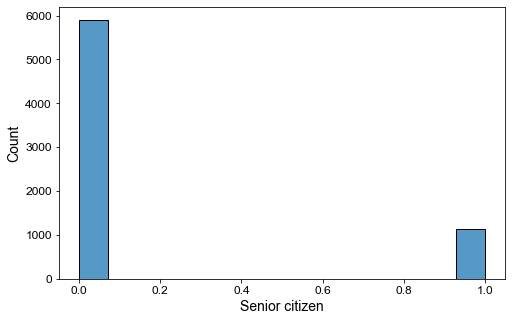

In [10]:
# numerical variables histograms -- SeniorCitizens
afont = {"fontname":"Arial"}
plt.figure(figsize=(8,5))
sns.histplot(data=telco, x="SeniorCitizen")
plt.xlabel("Senior citizen", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text yticklabel objects>)

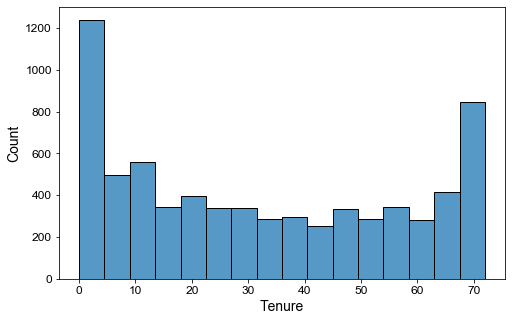

In [11]:
# numerical variables histograms -- tenure
afont = {"fontname":"Arial"}
plt.figure(figsize=(8,5))
sns.histplot(data=telco, x="tenure")
plt.xlabel("Tenure", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text yticklabel objects>)

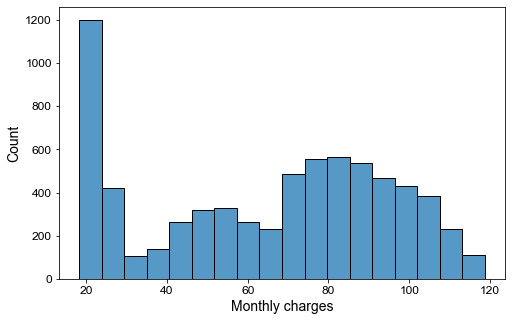

In [12]:
# numerical variables histograms -- MonthlyCharges
afont = {"fontname":"Arial"}
plt.figure(figsize=(8,5))
sns.histplot(data=telco, x="MonthlyCharges")
plt.xlabel("Monthly charges", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text yticklabel objects>)

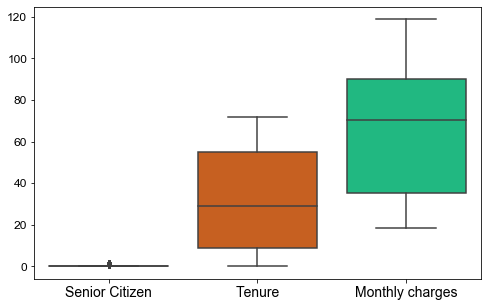

In [13]:
# boxplots 
fig, ax = plt.subplots(figsize=(8,5))
palette = ["#0895CF", "#E15906", "#08D188"]
g = sns.boxplot(data=telco, palette=palette)
g.set_xticklabels(["Senior Citizen", "Tenure", "Monthly charges"])
plt.xticks(size=14, **afont)
plt.yticks(size=12, **afont)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text yticklabel objects>)

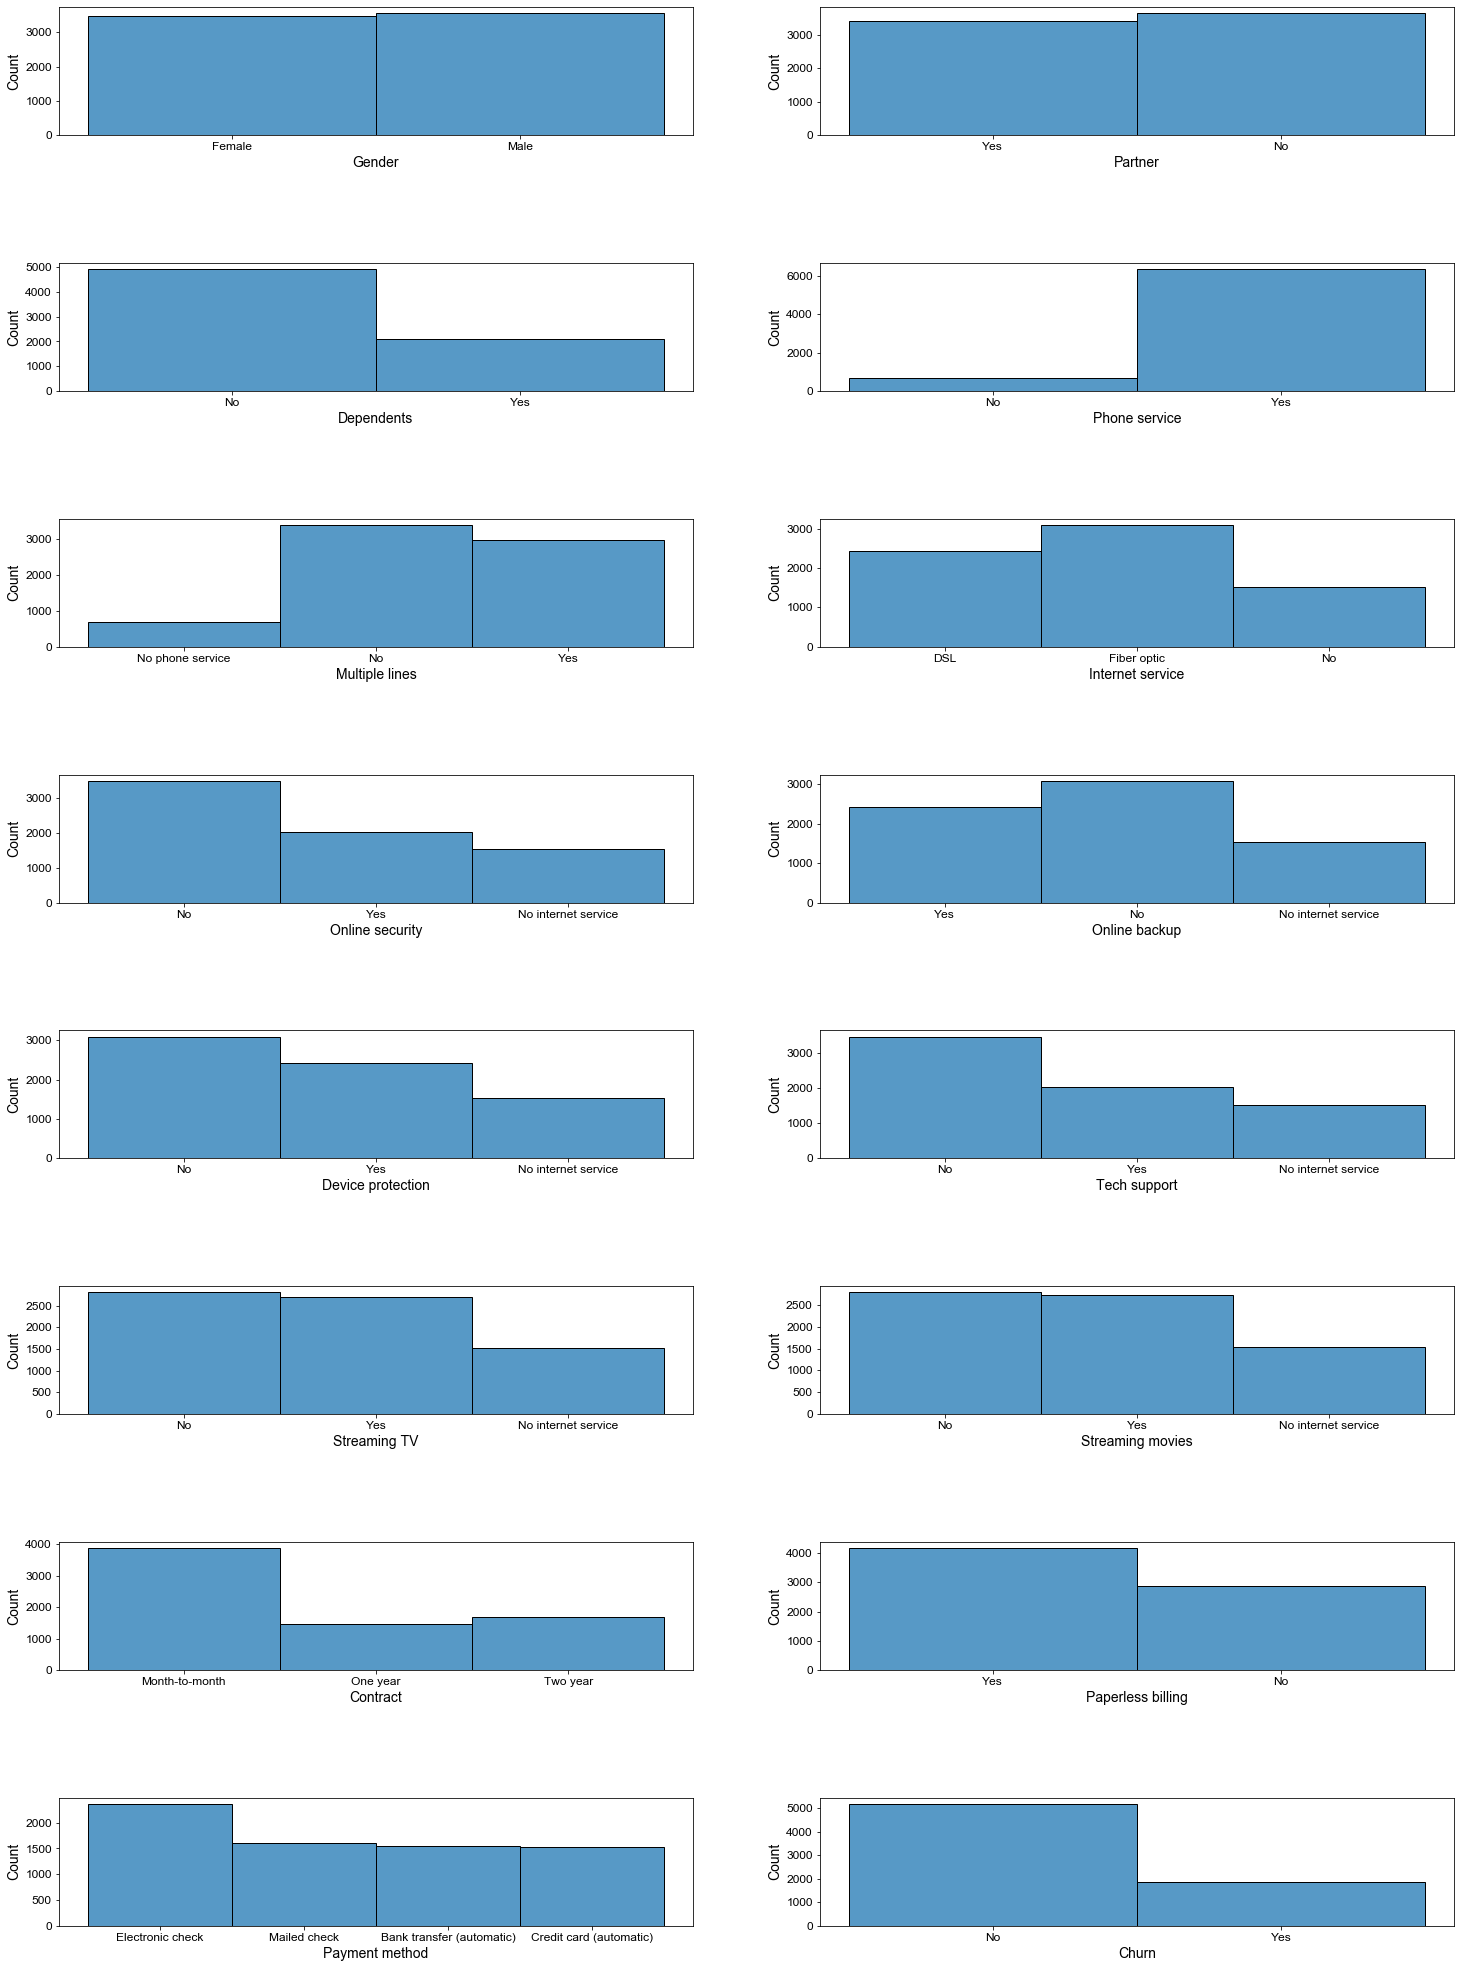

In [14]:
# categorical variables plots
fig = plt.figure(figsize=(25,40))
plt.subplots_adjust(wspace=0.2, hspace=1)
fig.add_subplot(921)
sns.histplot(data=telco, x="gender")
plt.xlabel("Gender", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(922)
sns.histplot(data=telco, x="Partner")
plt.xlabel("Partner", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(923)
sns.histplot(data=telco, x="Dependents")
plt.xlabel("Dependents", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(924)
sns.histplot(data=telco, x="PhoneService")
plt.xlabel("Phone service", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(925)
sns.histplot(data=telco, x="MultipleLines")
plt.xlabel("Multiple lines", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(926)
sns.histplot(data=telco, x="InternetService")
plt.xlabel("Internet service", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(927)
sns.histplot(data=telco, x="OnlineSecurity")
plt.xlabel("Online security", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(928)
sns.histplot(data=telco, x="OnlineBackup")
plt.xlabel("Online backup", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(929)
sns.histplot(data=telco, x="DeviceProtection")
plt.xlabel("Device protection", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(9,2,10)
sns.histplot(data=telco, x="TechSupport")
plt.xlabel("Tech support", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(9,2,11)
sns.histplot(data=telco, x="StreamingTV")
plt.xlabel("Streaming TV", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(9,2,12)
sns.histplot(data=telco, x="StreamingMovies")
plt.xlabel("Streaming movies", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(9,2,13)
sns.histplot(data=telco, x="Contract")
plt.xlabel("Contract", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(9,2,14)
sns.histplot(data=telco, x="PaperlessBilling")
plt.xlabel("Paperless billing", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(9,2,15)
sns.histplot(data=telco, x="PaymentMethod")
plt.xlabel("Payment method", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)
fig.add_subplot(9,2,16)
sns.histplot(data=telco, x="Churn")
plt.xlabel("Churn", size=14, **afont)
plt.ylabel("Count", size=14, **afont)
plt.xticks(fontsize=12, **afont)
plt.yticks(fontsize=12, **afont)

### Data preparation for linear logistic regression

In [15]:
# subset telco dataset
tokeep = ["gender", "Partner", "MonthlyCharges", "Churn"]
telco_sub = telco.loc[:,tokeep]
telco_sub.head()

,gender,Partner,MonthlyCharges,Churn
0,Female,Yes,29.85,No
1,Male,No,56.95,No
2,Male,No,53.85,Yes
3,Male,No,42.30,No
4,Female,No,70.70,Yes


In [16]:
def cat2num(value, valuemap):
    """function to convert categorical to
    numerical values.
    
    e.g. male = 1
         female = 2
    """
    if not isinstance(value, str):
        errmsg = "\n\nERROR: Expected str, got {}\n."
        raise TypeError(errmsg.format(type(value).__name__))
    if not isinstance(valuemap, dict):
        errmsg = "\n\nERROR: Expected dict, got {}.\n"
        raise TypeError(errmsg.format(type(valuemap).__name__))
    if value not in valuemap.keys():
        errmsg = "\n\nERROR: Unable to map {}.\n"
        raise KeyError(errmsg.format(value))
    return valuemap[value]

telco_sub["gender"] = telco_sub.apply(lambda x : cat2num(x[0], {"Male":0, "Female":1}), axis=1)
telco_sub["Partner"] = telco_sub.apply(lambda x : cat2num(x[1], {"Yes":1, "No":0}), axis=1)
telco_sub["Churn"] = telco_sub.apply(lambda x : cat2num(x[3], {"Yes":1, "No":0}), axis=1)
telco_sub.head()

,gender,Partner,MonthlyCharges,Churn
0,1,1,29.85,0
1,0,0,56.95,0
2,0,0,53.85,1
3,0,0,42.30,0
4,1,0,70.70,1


In [17]:
# get Series of churn. If used `[[]]`, returns a DataFrame with Churn alone
churn = telco_sub["Churn"]  
churn.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [18]:
# drop 'Churn' from 'telco_sub'
telco_sub.drop(["Churn"], inplace=True, axis=1)
telco_sub.head()

,gender,Partner,MonthlyCharges
0,1,1,29.85
1,0,0,56.95
2,0,0,53.85
3,0,0,42.30
4,1,0,70.70


## Linear logistic regression

In [19]:
clf = LogisticRegression().fit(telco_sub, churn)  # x_train = telco_sub, y_train = churn
y_pred = clf.predict(telco_sub)
mscore = clf.score(telco_sub, churn)  # model score
print("Model score:\t%f" % mscore)

Model score:	0.724549


/Users/manuel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
# model parameters
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

We can now assess which variable contributes most to the model.

In [21]:
coeff_df = pd.DataFrame(telco_sub.columns)
coeff_df.columns = ["Feature"]
coeff_df["Correlation"] = pd.Series(clf.coef_[0])
coeff_df.sort_values(by=["Correlation"], ascending=False)

,Feature,Correlation
2,MonthlyCharges,0.017416
0,gender,0.014587
1,Partner,-0.839847


```MonthlyCharges``` variable seems to be the most related to the model. On the other hand, ```gender``` contributes at a little extent to the linear logistic model fit.